### <img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">

<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b></li> 
    <li>
     Prof. Marcelino Monteiro de Andrade Dr.</li>
</ul> 
    
    Segunda (2/3) Atividade Prática Avaliativa - Algo Trading
    Entrega da Atividade 31/08/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
<h2>Questões</h2>
&ensp;
    <ol> 
        <li>Implemente uma estratégia de trade automático baseado em duas médias móveis. Utilize um período mínimo de 3 anos, otimize nos dois primeiros anos e aplique no terceiro. Aproveite os ativos escolhidos na primeira avaliação, considere um capital de R$\100.000,00 e as taxas envolvidas na operação.</a></li>&ensp;
        <li>Implemente uma estratégia de trade automático baseado em duas médias móveis anteriores, adicionando à aplicação o RSI ou MACD. Utilize um período mínimo de 3 anos, otimize nos dois primeiros anos e aplique no terceiro. Aproveite os ativos escolhidos na questão 1.</a></li>&ensp;
        <li>Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex. Utilize um período mínimo de 3 anos, otimize nos dois primeiros anos e aplique no terceiro. Aplique nos ativos escolhidos na questão 1.</a></li>&ensp;
        <li>Compare os resultados das três estratégias de trades, quanto: a) Retorno de Capital, b) Número de Trades, c) Taxa de Acertos, d) Fator de Lucro, e) Índice Sharpe e o f) retorno dos ativos avaliados na condição buy&hold e com relação ao índice bovespa.</a></li>&ensp;
        <li>Observação: caso a equipe tenha o interesse em avaliar outras estratégias de algo trading e bem vindo também!</a></li>&ensp;        
</ol>
</div>


In [1]:
# Description:
# This program uses the three moving avarage crossover strategy to determine when to buy and sell stocks
%pip install pandas numpy matplotlib investpy seaborn


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Selects 30 most liquid assets in IBOV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import investpy
import yfinance as yf
from tqdm import tqdm
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
base_link = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?'
index_list = ['IBRA']
df_index = []

In [3]:
#downloading data from yahooFinance print(f'[+] Downloading indexes: {index_list}')
sample_years = 3

for index in tqdm(index_list):
    try:
        df_index.append(pd.read_html(f"{base_link}Indice={index}&idioma=pt-br")[0]['Código'])

    except ValueError:
        print(f'[-] Error when downloading index: {index}')

all_stock_codes = set()
for index in df_index:
    for code in index[:-1]:
        all_stock_codes.add(code + ".SA")
num_total_stocks = len(all_stock_codes)
print(f"\n[+] Collected codes: {num_total_stocks} \n {all_stock_codes}")

end_date = dt.date.today()
start_date = end_date - dt.timedelta(days=sample_years*365)
print(f"\n[+] Collecting data from: {start_date} until {end_date}")

stocks_open = pd.DataFrame()
stocks_high = pd.DataFrame()
stocks_low = pd.DataFrame()
stocks_close = pd.DataFrame()
stocks_volume = pd.DataFrame()

cols = []
for code in tqdm(all_stock_codes):
    try:
        stock_downloaded_data = yf.download(code, str(start_date), str(
            end_date), progress=False, show_errors=False)

        dataFrame_stocks_open = stock_downloaded_data['Open']
        dataFrame_stocks_high = stock_downloaded_data['Close']
        dataFrame_stocks_low = stock_downloaded_data['High']
        dataFrame_stocks_close = stock_downloaded_data['Low']
        dataFrame_stocks_volume = stock_downloaded_data['Volume']

        stocks_open = pd.concat([stocks_open, dataFrame_stocks_open], axis=1)
        stocks_high = pd.concat([stocks_high, dataFrame_stocks_high], axis=1)
        stocks_low = pd.concat([stocks_low, dataFrame_stocks_low], axis=1)
        stocks_close = pd.concat(
            [stocks_close, dataFrame_stocks_close], axis=1)
        stocks_volume = pd.concat(
            [stocks_volume, dataFrame_stocks_volume], axis=1)

        cols.append(code)

    except:
        print('error while downloading data from yahooFinance')

stocks_open.columns = cols
stocks_high.columns = cols
stocks_low.columns = cols
stocks_close.columns = cols
stocks_volume.columns = cols

assets_dataset = (('Open Dataset', stocks_open),
                  ('high dataset', stocks_high),
                  ('low dataset', stocks_low),
                  ('close dataset', stocks_close),
                  ('volume dataset', stocks_volume))


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]



[+] Collected codes: 165 
 {'MGLU3.SA', 'SBSP3.SA', 'ABCB4.SA', 'DMMO3.SA', 'RAPT4.SA', 'TIET11.SA', 'CPFE3.SA', 'MOVI3.SA', 'CMIG4.SA', 'ITUB3.SA', 'ITUB4.SA', 'IGTA3.SA', 'HAPV3.SA', 'EZTC3.SA', 'BBAS3.SA', 'MRVE3.SA', 'GOAU4.SA', 'BRSR6.SA', 'FLRY3.SA', 'BRPR3.SA', 'VALE3.SA', 'LAME3.SA', 'YDUQ3.SA', 'ODPV3.SA', 'NTCO3.SA', 'ABEV3.SA', 'AMAR3.SA', 'CPLE3.SA', 'RENT3.SA', 'TUPY3.SA', 'DTEX3.SA', 'OMGE3.SA', 'RLOG3.SA', 'CCRO3.SA', 'CRFB3.SA', 'ELET6.SA', 'CIEL3.SA', 'BRAP4.SA', 'BBDC3.SA', 'SOMA3.SA', 'BPAN4.SA', 'VVAR3.SA', 'EQTL3.SA', 'RADL3.SA', 'CEAB3.SA', 'VIVA3.SA', 'ELET3.SA', 'IRBR3.SA', 'SLCE3.SA', 'SUZB3.SA', 'TRPL4.SA', 'HBOR3.SA', 'GOLL4.SA', 'PRIO3.SA', 'POSI3.SA', 'BIDI11.SA', 'RCSL4.SA', 'TRIS3.SA', 'MILS3.SA', 'SQIA3.SA', 'TIMS3.SA', 'ENGI11.SA', 'ECOR3.SA', 'SMLS3.SA', 'JBSS3.SA', 'PARD3.SA', 'SEER3.SA', 'TEND3.SA', 'AALR3.SA', 'ITSA4.SA', 'KLBN11.SA', 'PETR3.SA', 'HGTX3.SA', 'CAML3.SA', 'USIM5.SA', 'HYPE3.SA', 'BRKM5.SA', 'GFSA3.SA', 'BIDI4.SA', 'GUAR3.SA', 'LREN3.

100%|██████████| 165/165 [01:33<00:00,  1.76it/s]



 [+] Data integrity:
> Open Dataset


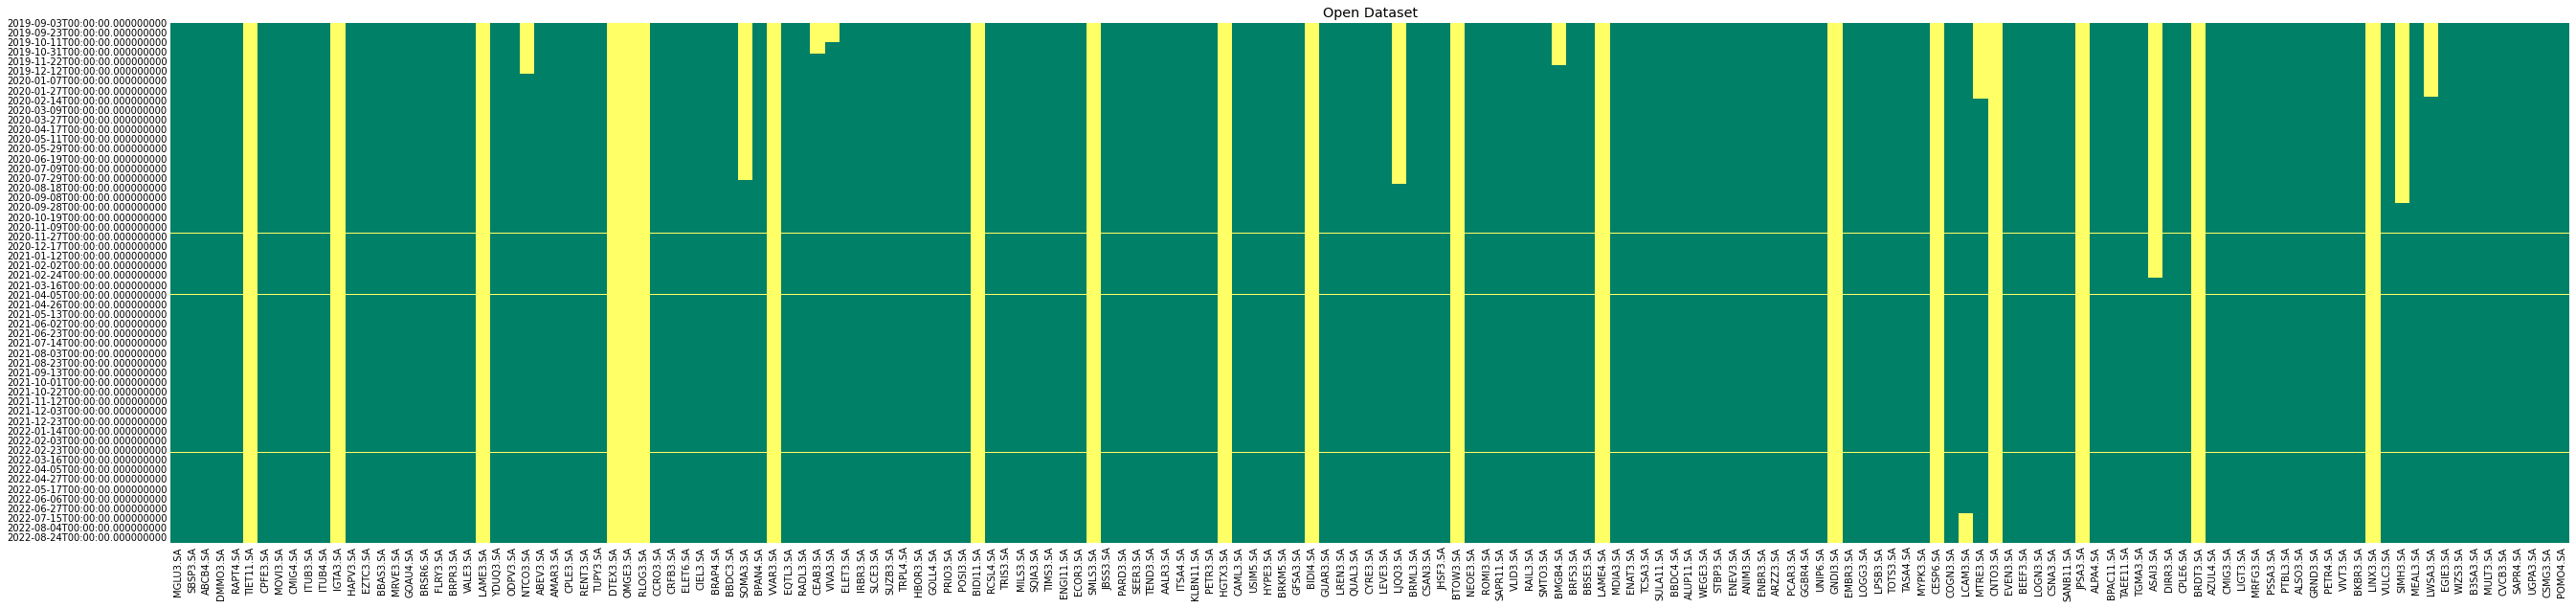

> high dataset


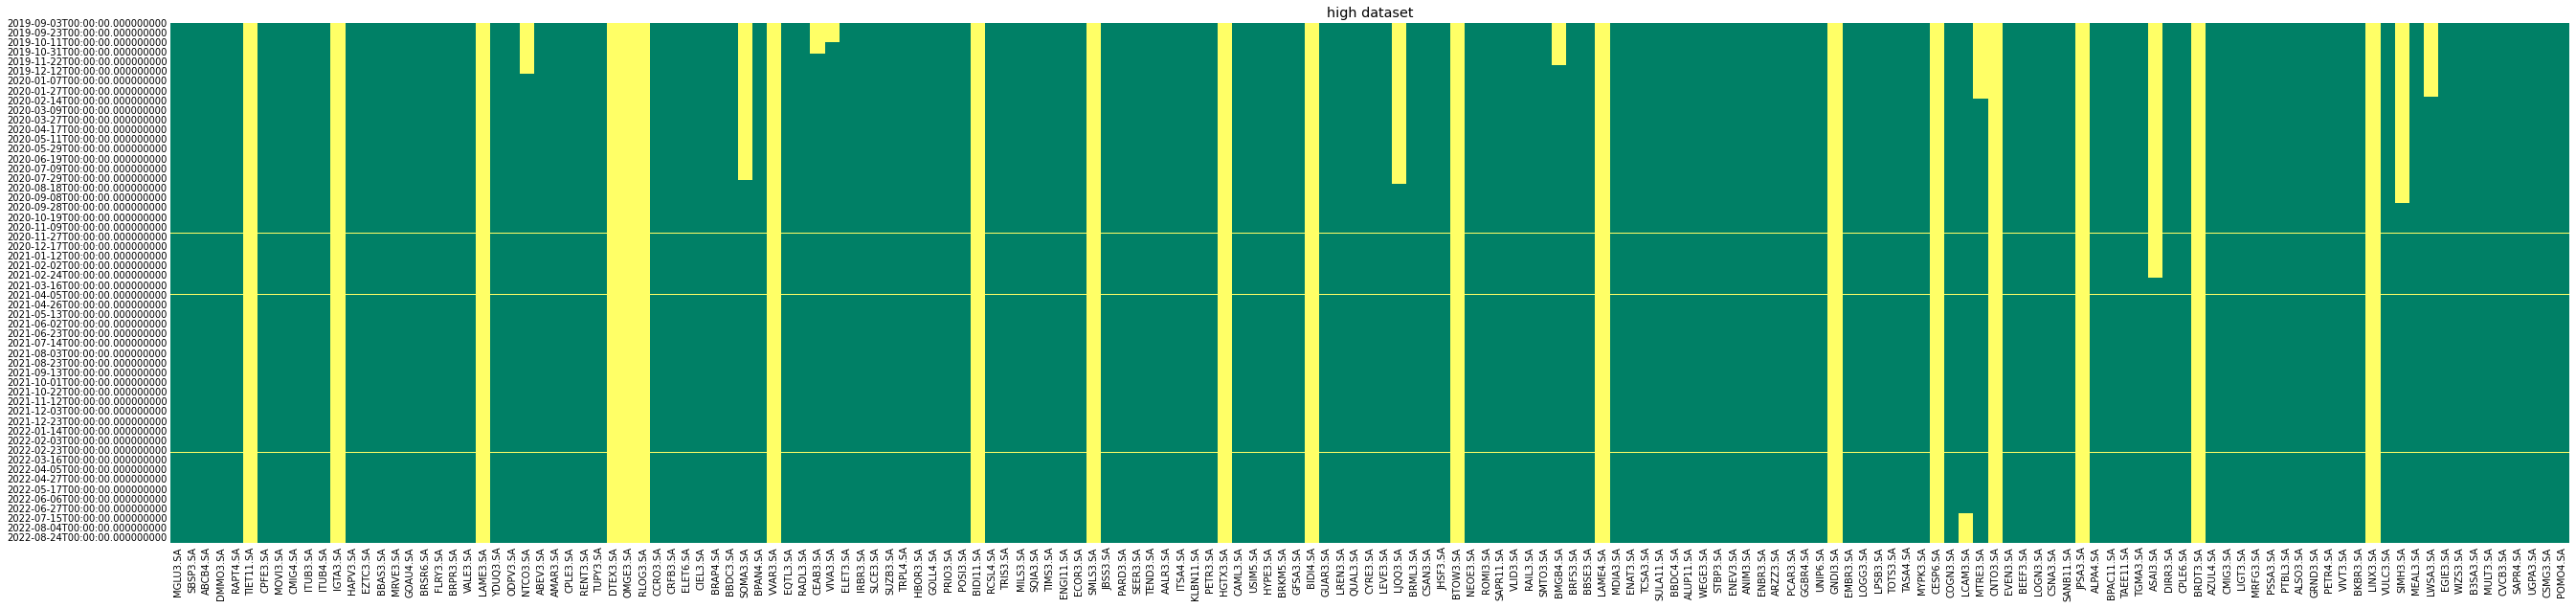

> low dataset


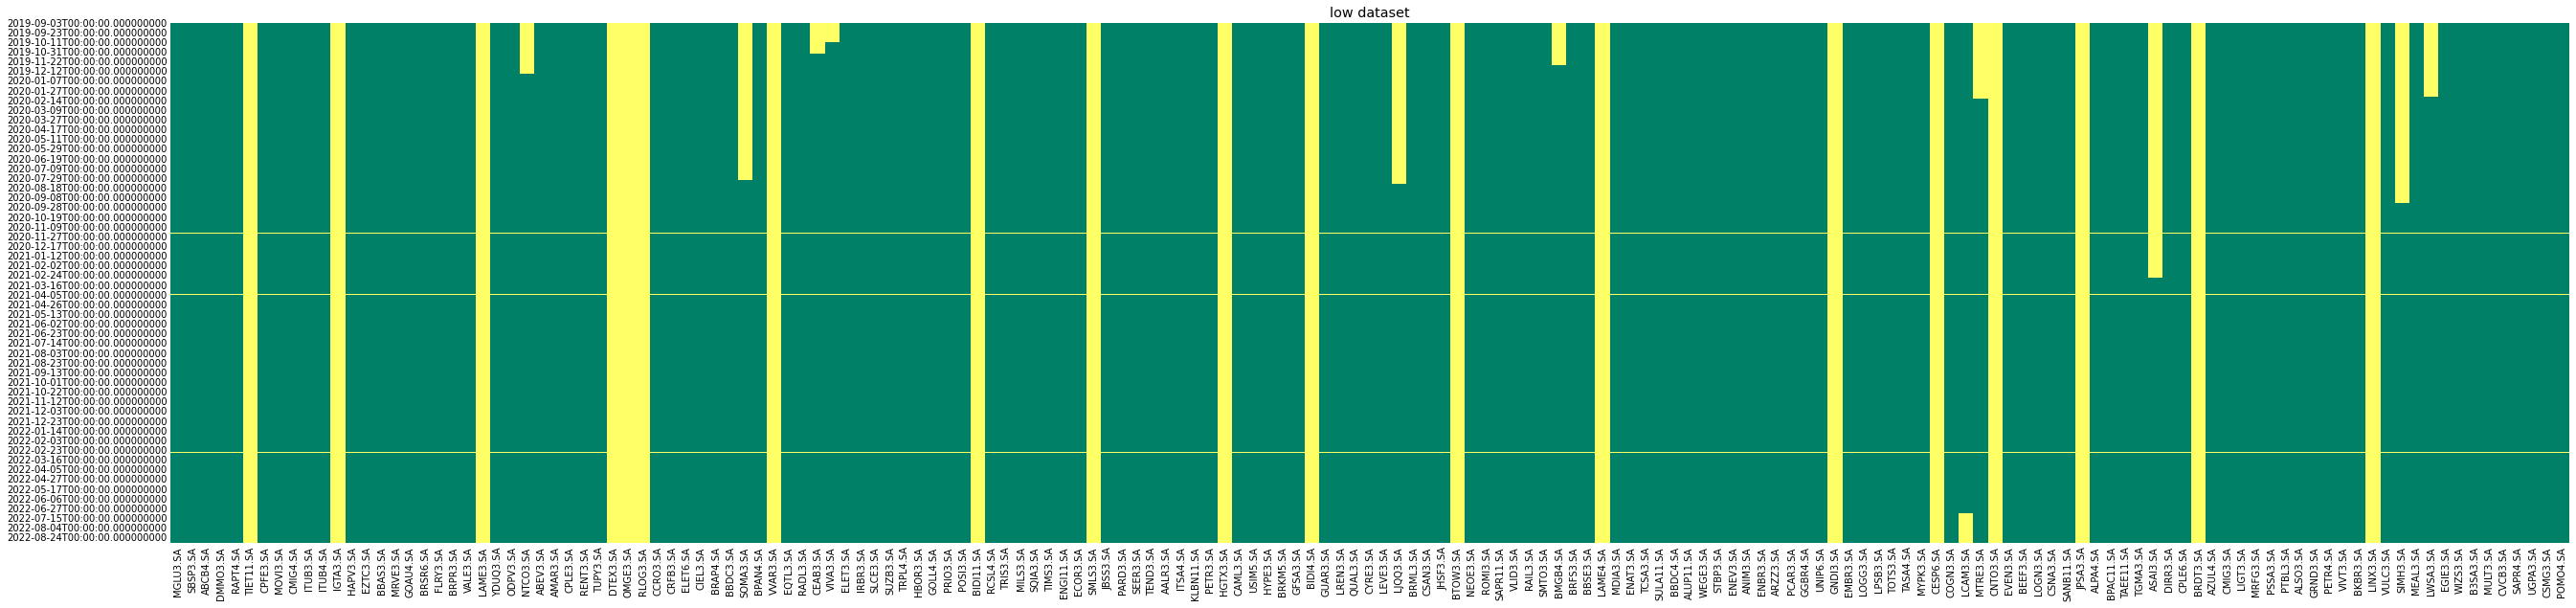

> close dataset


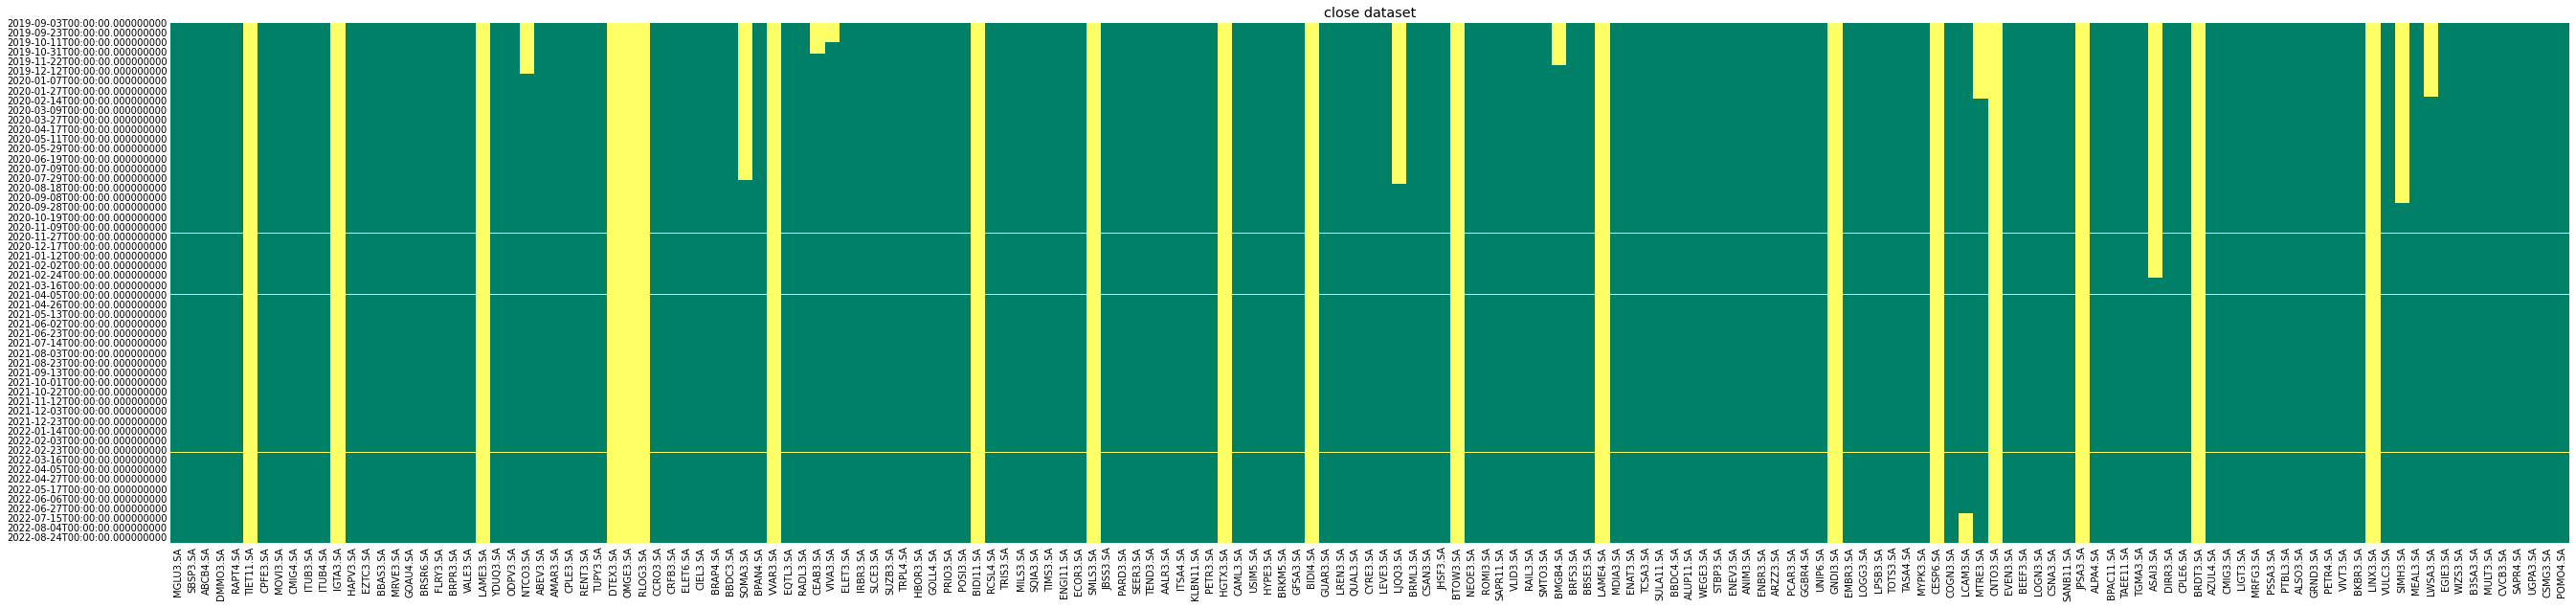

> volume dataset


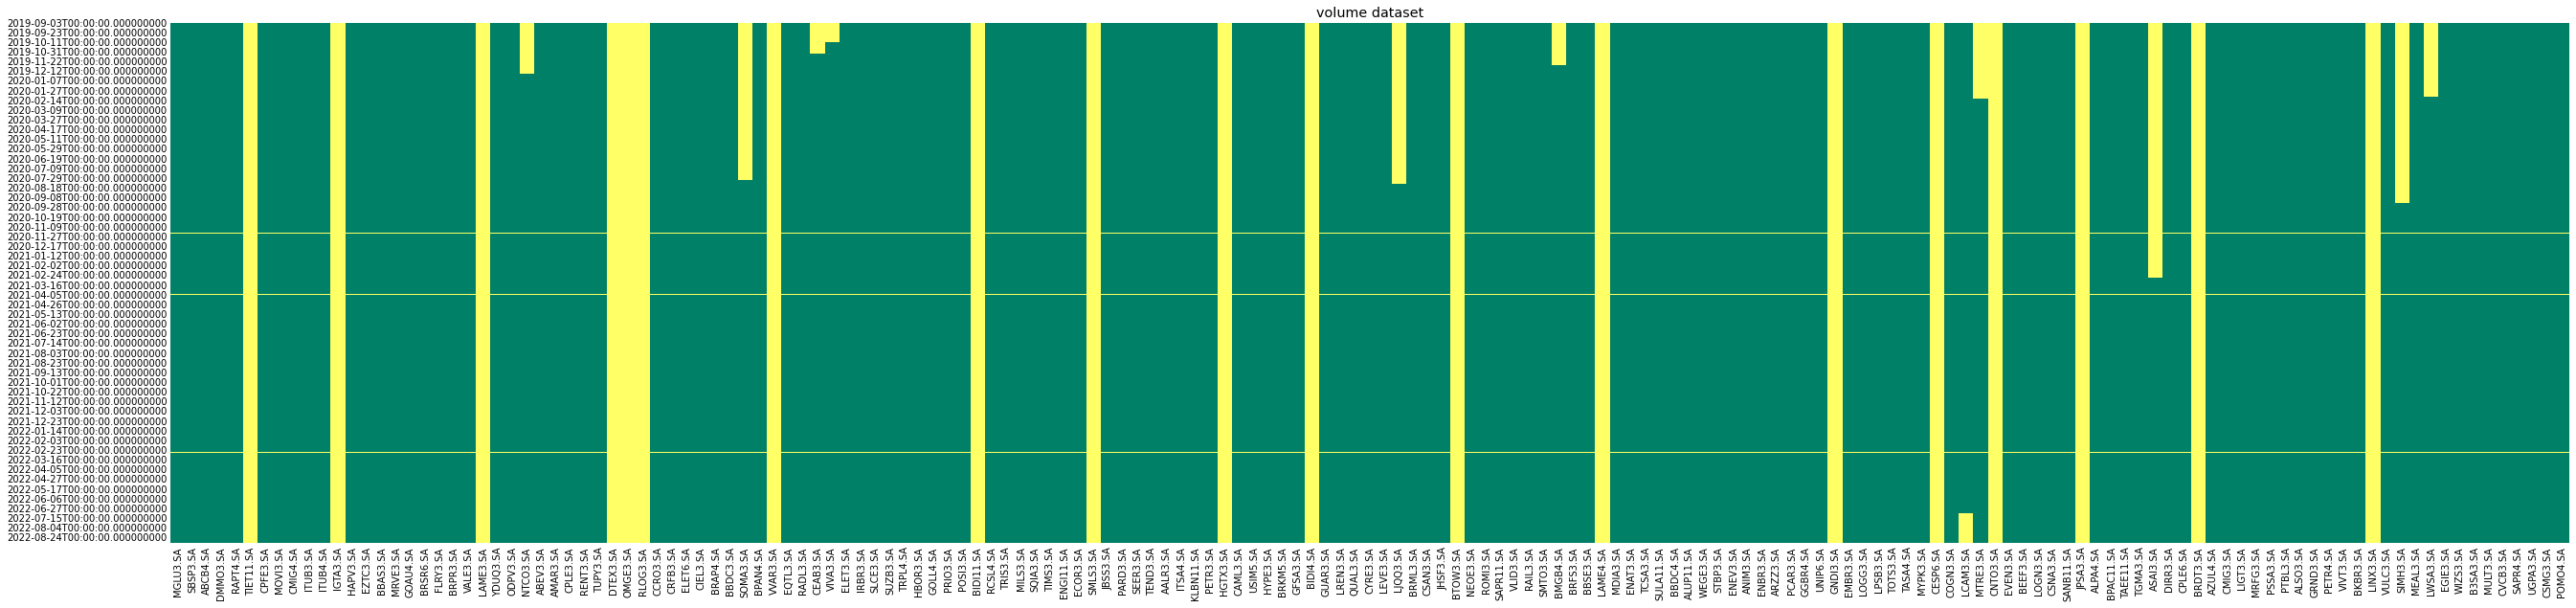


[+] Cleaning up dataset:
> Open Dataset is clean


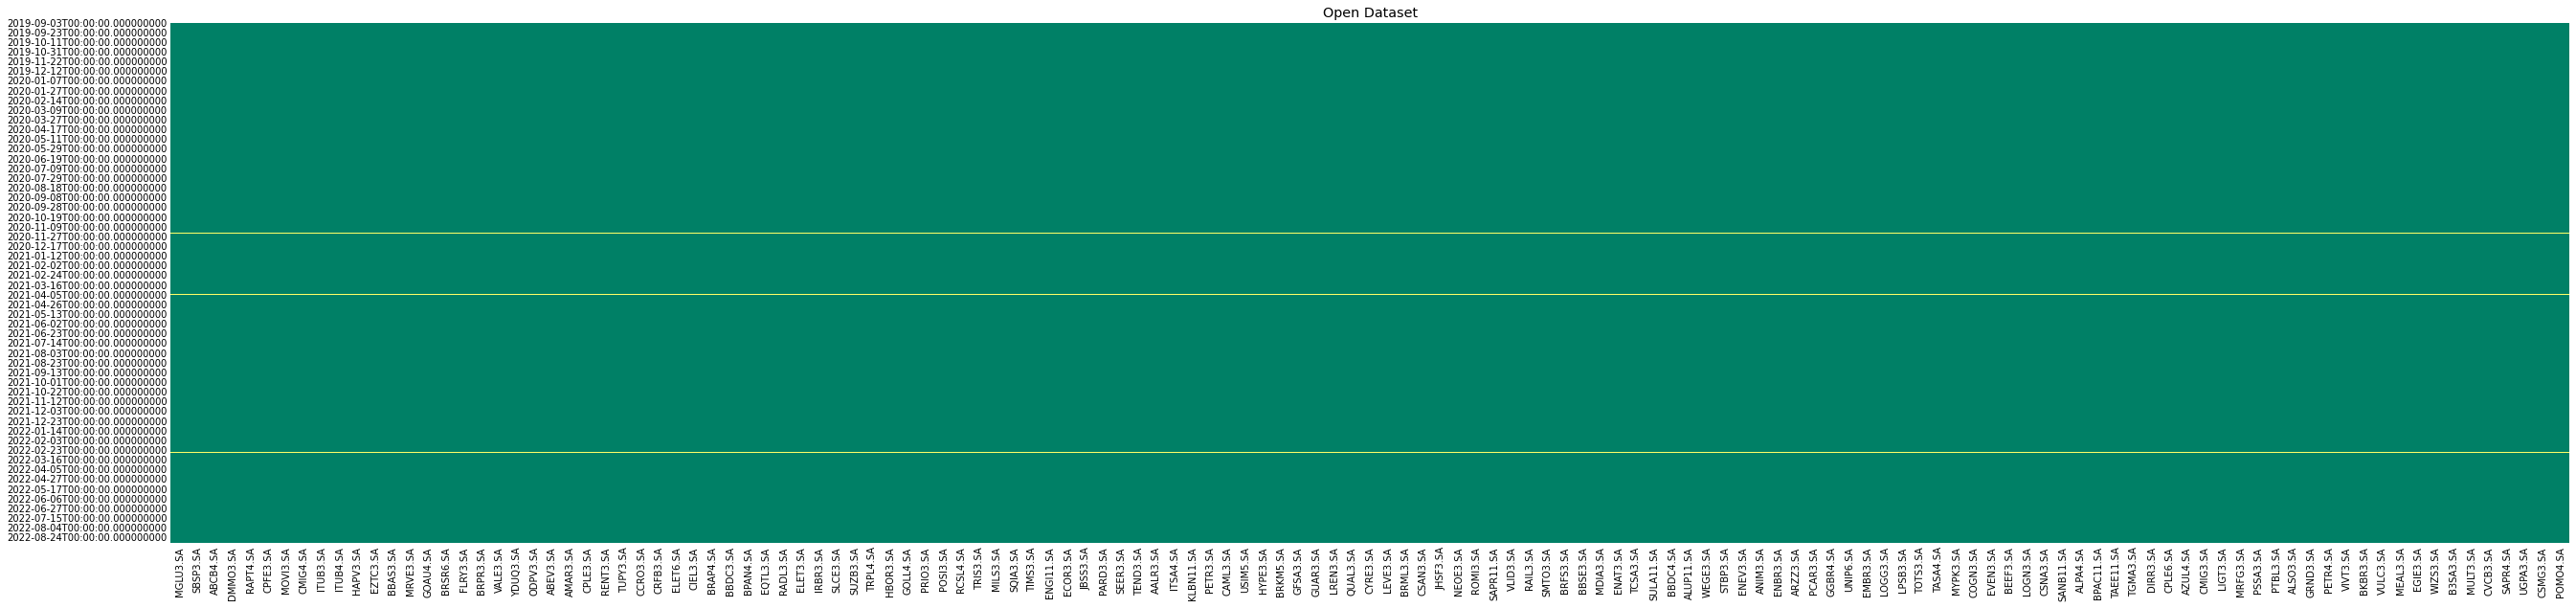

> high dataset is clean


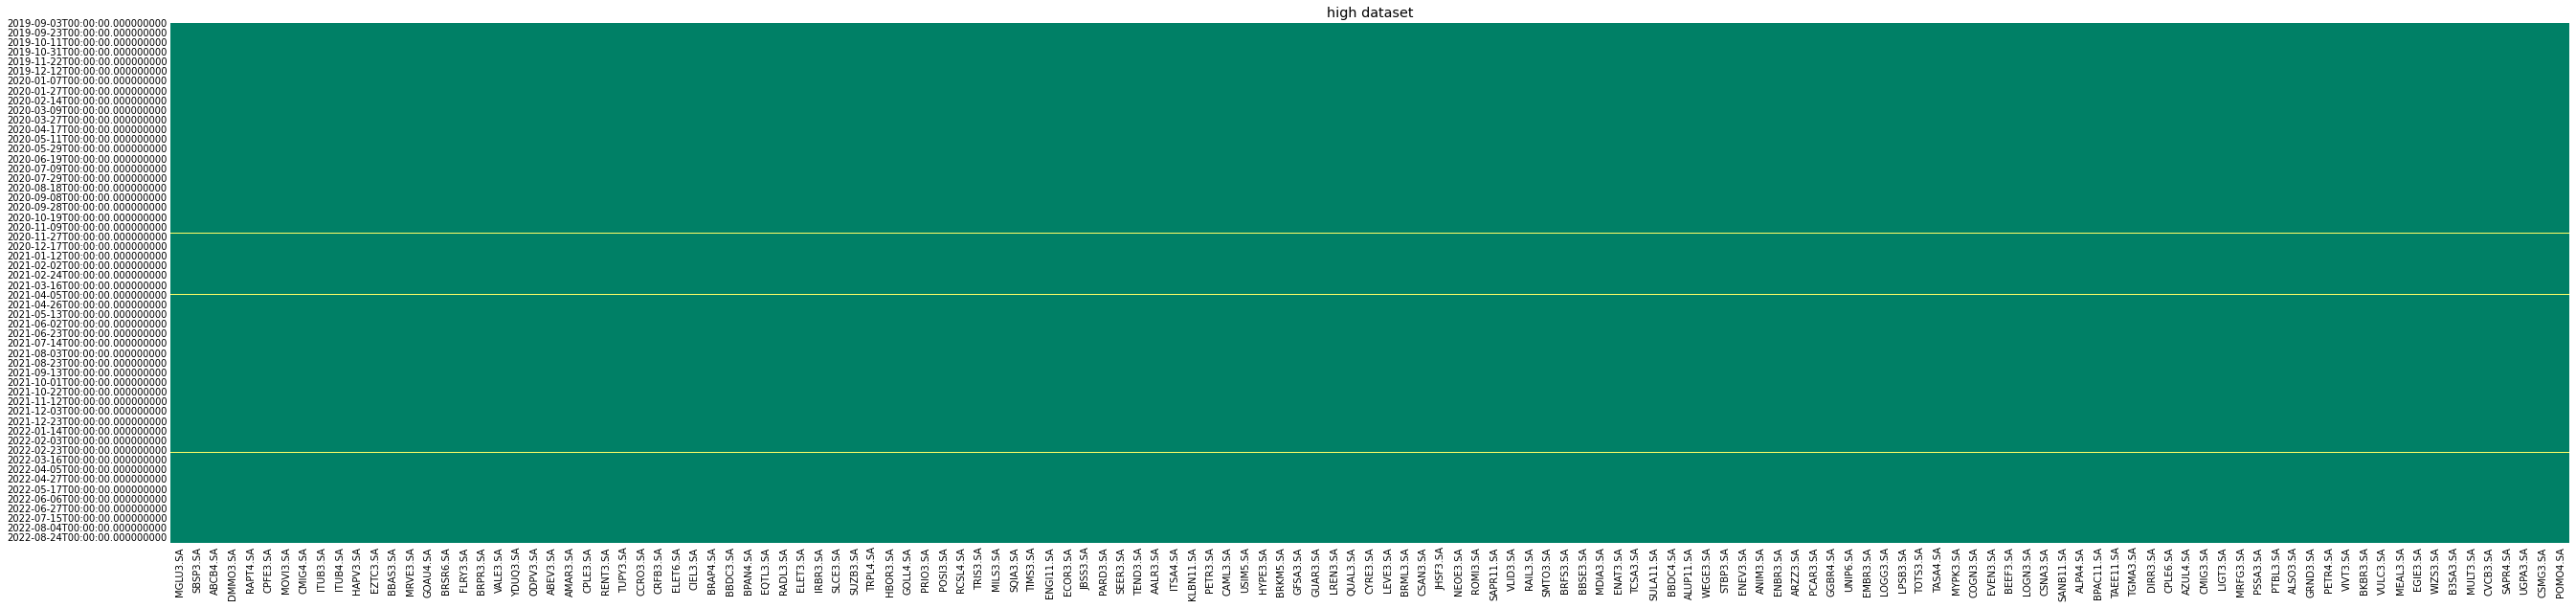

> low dataset is clean


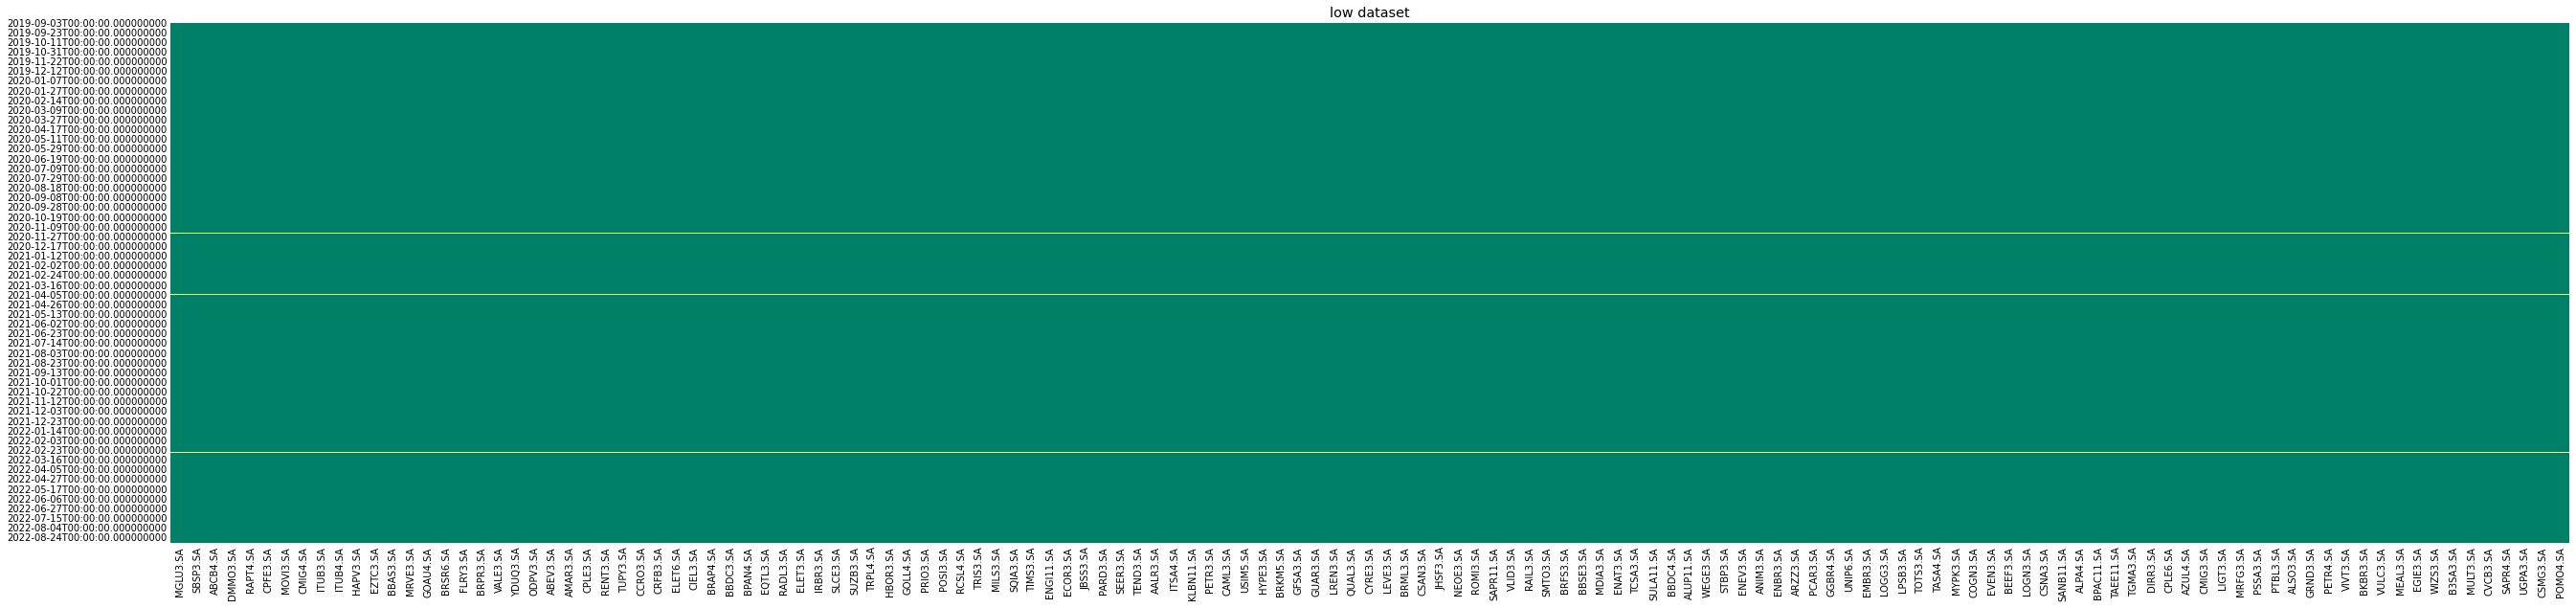

> close dataset is clean


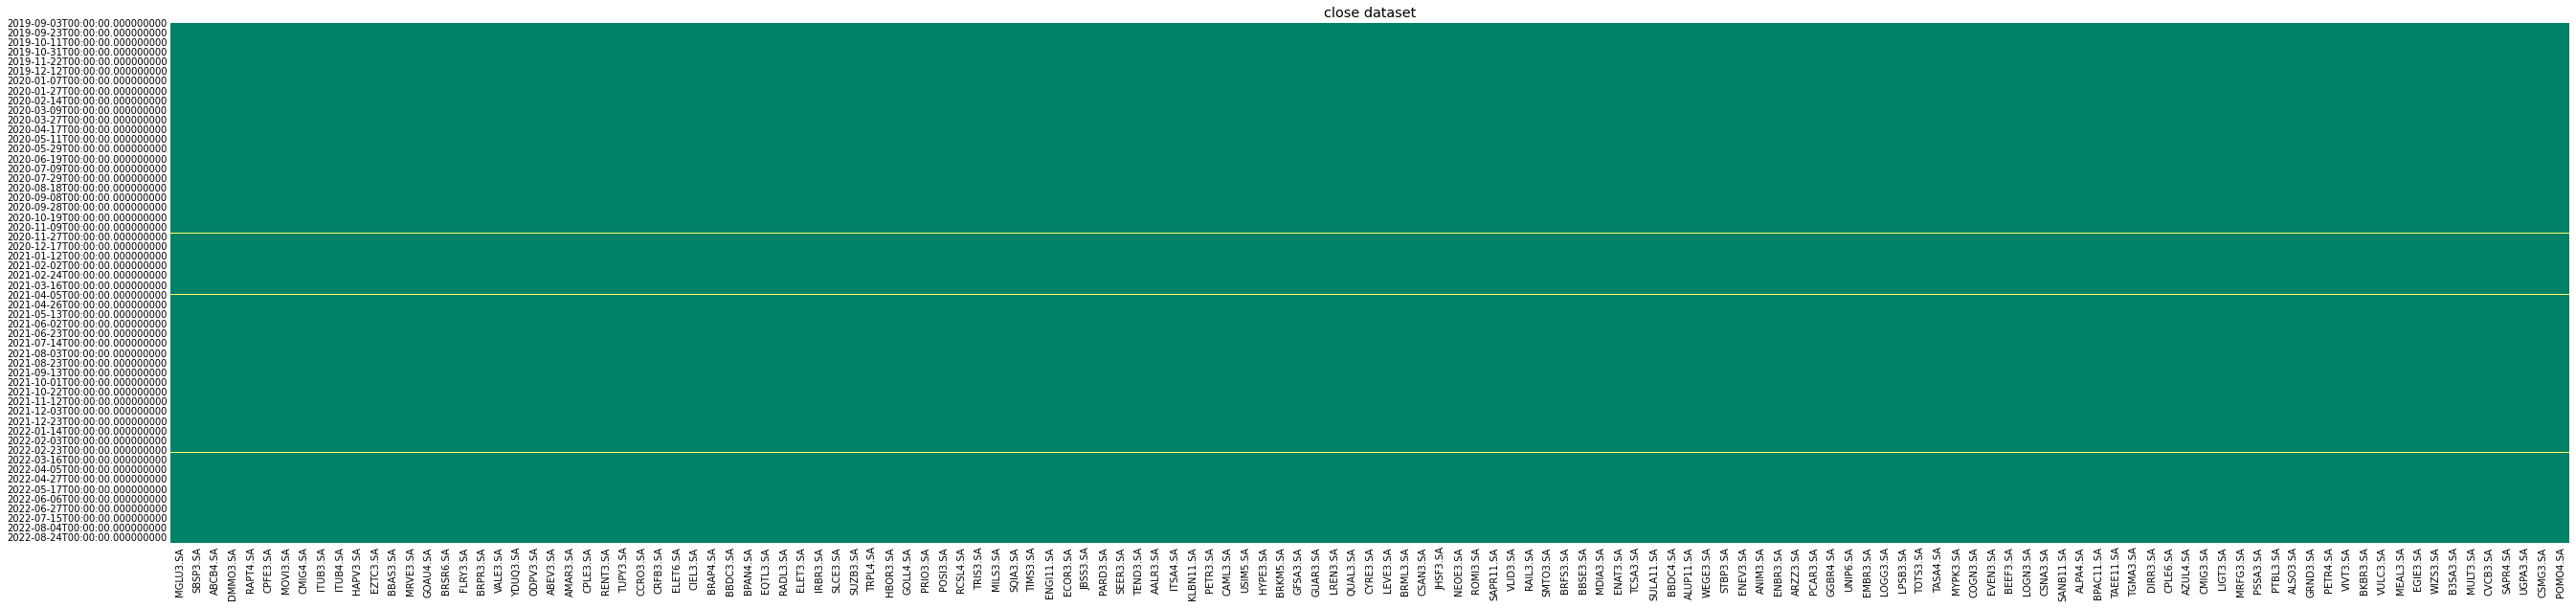

> volume dataset is clean


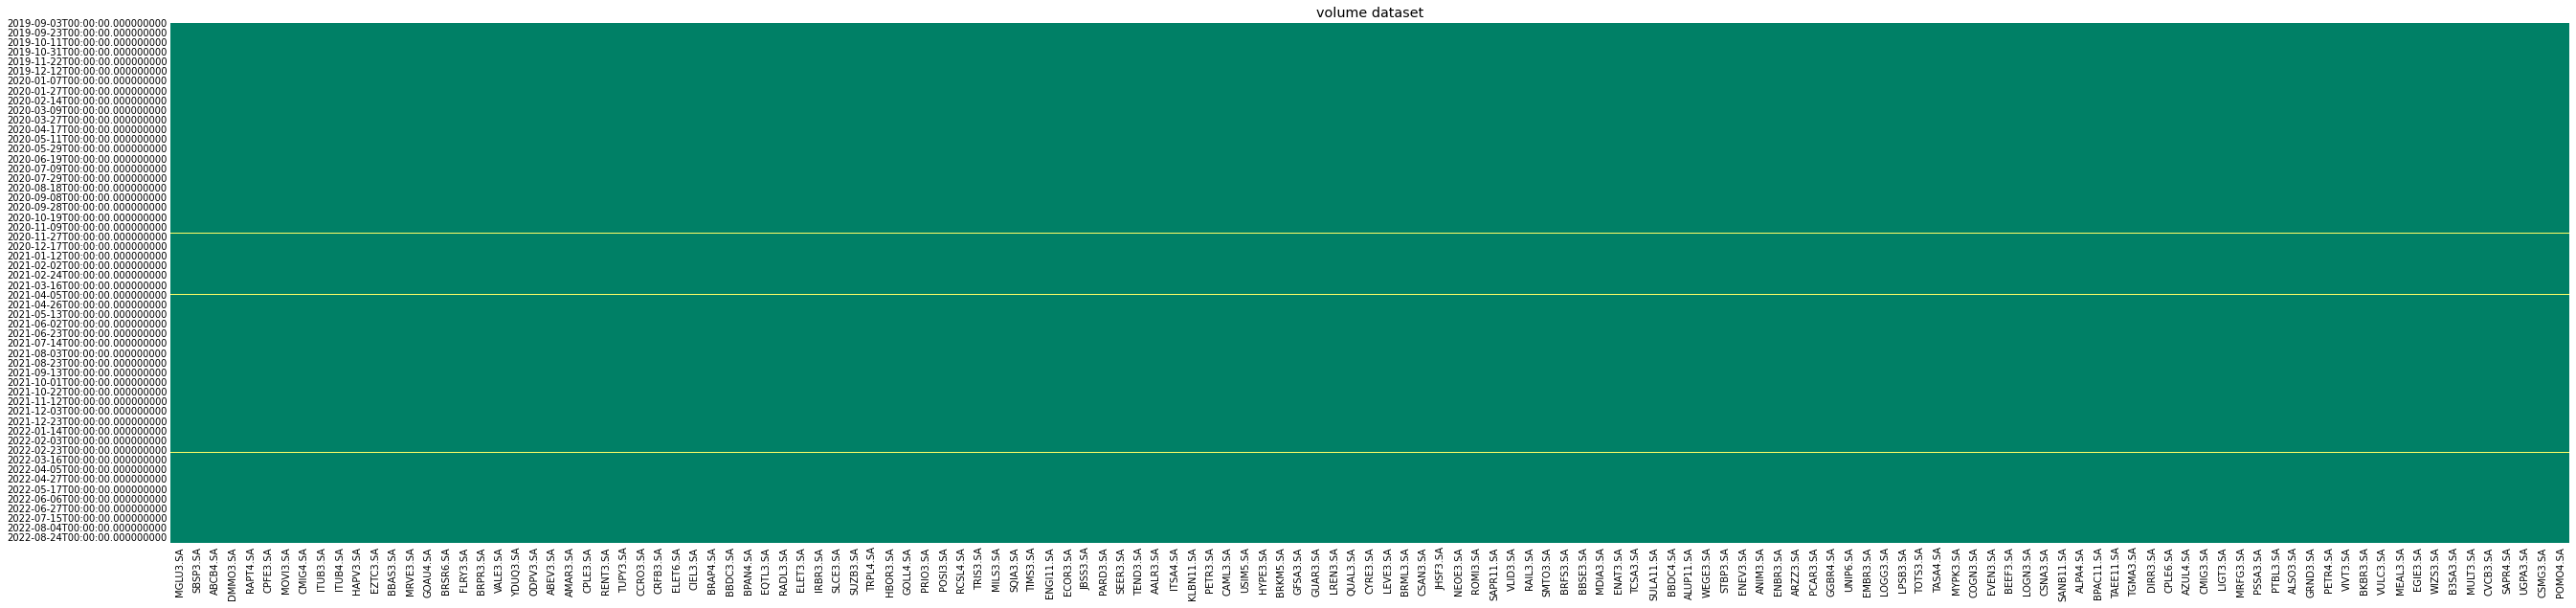


[+] Amount of assets after filtering: 135/165
 ['MGLU3.SA', 'SBSP3.SA', 'ABCB4.SA', 'DMMO3.SA', 'RAPT4.SA', 'CPFE3.SA', 'MOVI3.SA', 'CMIG4.SA', 'ITUB3.SA', 'ITUB4.SA', 'HAPV3.SA', 'EZTC3.SA', 'BBAS3.SA', 'MRVE3.SA', 'GOAU4.SA', 'BRSR6.SA', 'FLRY3.SA', 'BRPR3.SA', 'VALE3.SA', 'YDUQ3.SA', 'ODPV3.SA', 'ABEV3.SA', 'AMAR3.SA', 'CPLE3.SA', 'RENT3.SA', 'TUPY3.SA', 'CCRO3.SA', 'CRFB3.SA', 'ELET6.SA', 'CIEL3.SA', 'BRAP4.SA', 'BBDC3.SA', 'BPAN4.SA', 'EQTL3.SA', 'RADL3.SA', 'ELET3.SA', 'IRBR3.SA', 'SLCE3.SA', 'SUZB3.SA', 'TRPL4.SA', 'HBOR3.SA', 'GOLL4.SA', 'PRIO3.SA', 'POSI3.SA', 'RCSL4.SA', 'TRIS3.SA', 'MILS3.SA', 'SQIA3.SA', 'TIMS3.SA', 'ENGI11.SA', 'ECOR3.SA', 'JBSS3.SA', 'PARD3.SA', 'SEER3.SA', 'TEND3.SA', 'AALR3.SA', 'ITSA4.SA', 'KLBN11.SA', 'PETR3.SA', 'CAML3.SA', 'USIM5.SA', 'HYPE3.SA', 'BRKM5.SA', 'GFSA3.SA', 'GUAR3.SA', 'LREN3.SA', 'QUAL3.SA', 'CYRE3.SA', 'LEVE3.SA', 'BRML3.SA', 'CSAN3.SA', 'JHSF3.SA', 'NEOE3.SA', 'ROMI3.SA', 'SAPR11.SA', 'VLID3.SA', 'RAIL3.SA', 'SMTO3.SA', 'BRFS3.SA', 

In [4]:
# Cleaning up dataset
print("\n [+] Data integrity:")
for name, datasets in assets_dataset:
    print(f"> {name}")
    output = datasets.copy()
    plt.figure(figsize=(40, 10))
    sns.heatmap(output.isnull(), cbar=False, cmap='summer').set(title=name)
    plt.show()


print("\n[+] Cleaning up dataset:")
clean_stocks_data = []
for name, datasets in assets_dataset:
    clean_df = datasets.loc[:, datasets.isnull().mean() < .01].copy()
    columns_set = set(x for x in clean_df.columns)
    all_stock_codes = all_stock_codes.intersection(columns_set)

    clean_stocks_data.append([name, clean_df])

for name, datasets in clean_stocks_data:
    if all_stock_codes.difference(set(datasets.columns)):
        raise Exception(
            f"[-] Dataset {name}, does not have column {all_stock_codes.difference(set(datasets.columns))}")

    print(f"> {name} is clean")
    output = datasets.copy()
    plt.figure(figsize=(40, 10))
    sns.heatmap(output.isnull(), cbar=False, cmap='summer').set(title=name)
    plt.show()

ativos_data_sets_clean = {'Open Dataset': clean_stocks_data[0][1],
                          'Close Dataset': clean_stocks_data[1][1],
                          'High Dataset': clean_stocks_data[2][1],
                          'Low Dataset': clean_stocks_data[3][1],
                          'Volume Dataset': clean_stocks_data[4][1]}

print(
    f"\n[+] Amount of assets after filtering: {len(ativos_data_sets_clean['Close Dataset'].columns)}/{num_total_stocks}\n {list(ativos_data_sets_clean['Close Dataset'].columns)}")
print("\n[+] Picking the 30 most liquid ones:")
assets_sorted_by_liquidity = ativos_data_sets_clean["Volume Dataset"].mean(
).sort_values(ascending=False)[0: 30]
print(assets_sorted_by_liquidity.to_string())